In [1]:
!pip install pandas numpy matplotlib seaborn nltk textblob vaderSentiment


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\balag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\balag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:

df = pd.read_csv(r"C:\Users\balag\OneDrive\Desktop\dataset.csv")  


df.head()


,TEXT,DATE
0,"""I love this product! It works great!""",21-02-2025
1,"""Worst purchase I've ever made. Very disappoin...",21-02-2025
2,"""The quality is okay, but it could be better.""",22-02-2025
3,"""Not worth the price at all.""",22-02-2025
4,"""Amazing experience. Highly recommend it!""",23-02-2025


In [13]:

import pandas as pd
import re
import string

file_path = r"C:\Users\balag\OneDrive\Desktop\dataset.csv"
df = pd.read_csv(file_path)

df.rename(columns={'TEXT': 'text'}, inplace=True)
def clean_text(text):
    if isinstance(text, str): 
        text = text.lower()  
        text = re.sub(r'\d+', '', text)  
        text = text.translate(str.maketrans('', '', string.punctuation))  
        text = text.strip()  
        text = ' '.join(text.split()) 
        return text
    return ""  
df['cleaned_text'] = df['text'].apply(clean_text)
df.head()


,text,DATE,cleaned_text
0,"""I love this product! It works great!""",21-02-2025,i love this product it works great
1,"""Worst purchase I've ever made. Very disappoin...",21-02-2025,worst purchase ive ever made very disappointed
2,"""The quality is okay, but it could be better.""",22-02-2025,the quality is okay but it could be better
3,"""Not worth the price at all.""",22-02-2025,not worth the price at all
4,"""Amazing experience. Highly recommend it!""",23-02-2025,amazing experience highly recommend it


In [14]:
from textblob import TextBlob
def get_sentiment_textblob(text):
    if isinstance(text, str) and text.strip():  
        blob = TextBlob(text)
        return blob.sentiment.polarity  
    return 0  

df['sentiment_textblob'] = df['cleaned_text'].apply(get_sentiment_textblob)
df[['text', 'cleaned_text', 'sentiment_textblob']].head()


,text,cleaned_text,sentiment_textblob
0,"""I love this product! It works great!""",i love this product it works great,0.6500
1,"""Worst purchase I've ever made. Very disappoin...",worst purchase ive ever made very disappointed,-0.9875
2,"""The quality is okay, but it could be better.""",the quality is okay but it could be better,0.5000
3,"""Not worth the price at all.""",not worth the price at all,-0.1500
4,"""Amazing experience. Highly recommend it!""",amazing experience highly recommend it,0.3800


In [15]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_vader(text):
    if isinstance(text, str) and text.strip():  
        sentiment = analyzer.polarity_scores(text)
        return sentiment['compound']  
    return 0  
df['sentiment_vader'] = df['cleaned_text'].apply(get_sentiment_vader)
df[['text', 'cleaned_text', 'sentiment_vader']].head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\balag\AppData\Roaming\nltk_data...


,text,cleaned_text,sentiment_vader
0,"""I love this product! It works great!""",i love this product it works great,0.8519
1,"""Worst purchase I've ever made. Very disappoin...",worst purchase ive ever made very disappointed,-0.8173
2,"""The quality is okay, but it could be better.""",the quality is okay but it could be better,0.6486
3,"""Not worth the price at all.""",not worth the price at all,-0.1695
4,"""Amazing experience. Highly recommend it!""",amazing experience highly recommend it,0.7645


C:\Users\balag\AppData\Local\Temp\ipykernel_36364\4283103351.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily_sentiment = df.resample('D').mean()


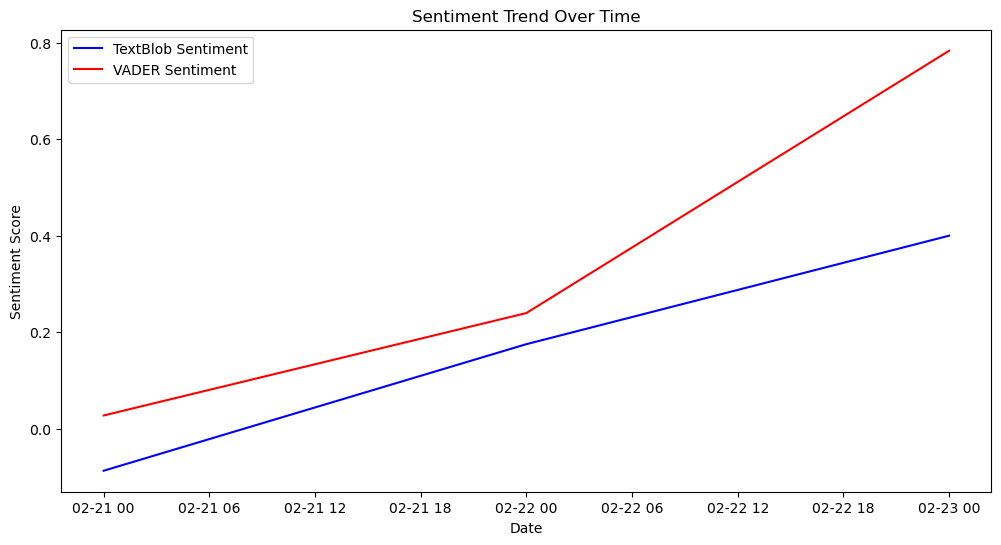

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y', errors='coerce')

analyzer = SentimentIntensityAnalyzer()

df['sentiment_textblob'] = df['TEXT'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_vader'] = df['TEXT'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df.set_index('date', inplace=True)
df_daily_sentiment = df.resample('D').mean()
plt.figure(figsize=(12,6))
plt.plot(df_daily_sentiment.index, df_daily_sentiment['sentiment_textblob'], label='TextBlob Sentiment', color='blue')
plt.plot(df_daily_sentiment.index, df_daily_sentiment['sentiment_vader'], label='VADER Sentiment', color='red')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()


In [20]:
def categorize_sentiment(score):
    if pd.isna(score):  
        return 'unknown'
    elif score > 0.1:  
        return 'strongly_positive'
    elif score > 0.05:
        return 'positive'
    elif score < -0.1:  
        return 'strongly_negative'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_category'] = df['sentiment_vader'].apply(categorize_sentiment)

sentiment_distribution = df['sentiment_category'].value_counts()
print(sentiment_distribution)


strongly_positive    3
strongly_negative    2
Name: sentiment_category, dtype: int64
